**Logistic regression - FashionMNIST - Keras**

Trong bài này chúng ta sẽ dùng logistic regression để phân loại dữ liệu trong bộ dữ liệu MNIST sử dụng Keras.


**1. Chuẩn bị dữ liệu**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


from keras.datasets import fashion_mnist

**1.1. Tải dữ liệu FashionMNIST** 

FashionMNIST chứa các hình ảnh thuộc 10 lớp, mỗi lớp có 6000 ảnh trong tập huấn luyện và 1000 ảnh trong tập kiểm tra. 




In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

**1.2. Xem xét dữ liệu**

In [ ]:
print('X_train_shape:', X_train.shape)
print('y_train_shape:', y_train.shape)
print('X_test_shape:', X_test.shape)
print('y_test_shape:', y_test.shape)

X_train_shape: (60000, 28, 28)
y_train_shape: (60000,)
X_test_shape: (10000, 28, 28)
y_test_shape: (10000,)


Ví dụ một bức ảnh được gắn nhãn từ tập **training**.




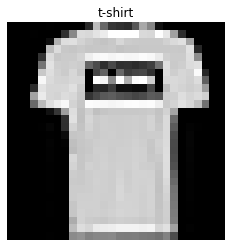

In [ ]:
# pick a sample to plot
sample = 1
# plot the sample
fig = plt.figure
plt.imshow(X_train[sample], cmap = 'gray')
plt.title(labels[int(y_train[sample])])
plt.axis('off')
plt.show()

Ví dụ 30 bức ảnh được dán nhãn từ tập **training**.

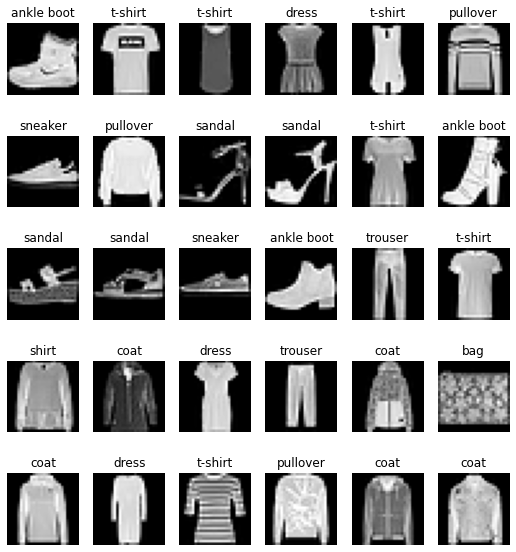

In [ ]:
num = 30
num_row = 5
num_col = 6

# plot images

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap = 'gray')
    ax.set_title(labels[int(y_train[i])])
    ax.set_axis_off()
plt.show()



**1.3. Trích dữ liệu dùng cho phân loại nhị phân**

Như chúng ta đã thấy tập y_train là một vector kích thước (10000,1) gồm 10 con số từ 0 đến 9 đại diện cho 10 lớp dữ liệu. Trong bài này chúng ta chỉ quan tâm đến phân loại dữ liệu cho 2 lớp, chính vì thế chúng ta sẽ trích xuất từ bộ dữ liệu FashionMNIST một bộ dữ liệu mới chỉ bao gồm hai lớp 'dress' và 'sandal' (tương ứng với nhãn 3 và 5).

In [ ]:
y_test = y_test.reshape((len(y_test),))
y_train = y_train.reshape((len(y_train),))
X_train_binary, y_train_binary = X_train[(y_train==3) | (y_train==5)], y_train[(y_train==3) | (y_train==5)]
X_test_binary, y_test_binary = X_test[(y_test==3) | (y_test==5)], y_test[(y_test==3) | (y_test==5)]

Hãy xem xét bộ dữ liệu mới như thế nào. Ví dụ 30 bức ảnh đầu tiên của bộ dữ liệu mới.

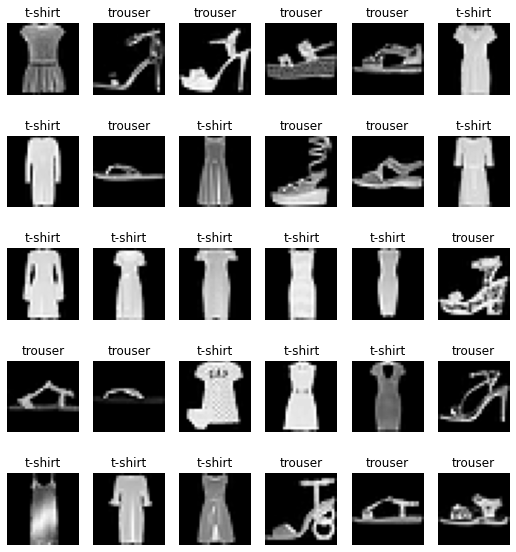

In [ ]:
num = 30
num_row = 5
num_col = 6

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train_binary[i], cmap = 'gray')
    ax.set_title(labels[int(y_train_binary[i])])
    ax.set_axis_off()
plt.show()

In [ ]:
print('X_train_binary_shape:', X_train_binary.shape)
print('y_train_binary:', y_train_binary.shape)

X_train_binary_shape: (12000, 28, 28)
y_train_binary: (12000,)


Tập y_train_binary bây giờ chỉ bao gồm 2 nhãn 3 và 5.

In [ ]:
y_train_binary[0:50]

array([3, 5, 5, 5, 5, 3, 3, 5, 3, 5, 5, 3, 3, 3, 3, 3, 3, 5, 5, 5, 3, 3,
       3, 5, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 3, 3, 5, 3, 5, 3,
       5, 5, 5, 5, 5, 3], dtype=uint8)

Để dùng được thuật toán logistic regression chúng ta phải biến đổi dữ liệu ảnh với kích thước 28x28 thành dạng vectơ với kích thước (28*28,).

In [ ]:
X_train_flatten = X_train_binary.reshape((-1, 28*28))
X_train_flatten.shape

(12000, 784)

Ta làm tương tự cho tập dữ liệu X_test và y_test.

In [ ]:
X_test_flatten = X_test_binary.reshape((-1, 28*28))
X_test_flatten.shape

(2000, 784)

Chúng ta sẽ "bình thường hoá" dữ liệu để việc huấn luyện được nhanh hơn.

In [ ]:
X_train_norm = X_train_flatten / 255.0
X_test_norm = X_test_flatten / 255.0

Cuối cùng chúng ta sẽ đưa vecto y_train_binary và y_test_binary về dạng binary integers


In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train_binary)
y_train_binary = encoder.transform(y_train_binary)

In [ ]:
encoder.fit(y_test_binary)
y_test_binary = encoder.transform(y_test_binary)

Vecto y_train bây giờ được biểu diễn bằng một vecto với 2 class 0 và 1.

In [ ]:
y_train_binary[0:30]

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1])

**2. Xây dựng mô hình huấn luyện logistic regression**





Mô hình logistic regression được đề cập trong bài giảng.




In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(784,) , activation='sigmoid'))

In [ ]:
model.compile(optimizer ='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

**3. Huấn luyện logistic regression**

In [ ]:
M = model.fit(X_train_norm, y_train_binary)

375/375 [==============================] - 1s 910us/step - loss: 0.2115 - binary_accuracy: 0.9731


Ta thử huấn luyện qua 5 chu kỳ (epochs = EPOCHS), trong mỗi chu kỳ dữ liệu được chia thành những gói (batch_size = BATCH_SIZE).  

In [ ]:
EPOCHS = 5
BATCH_SIZE = 16

In [ ]:
M = model.fit(
  x = X_train_norm,
  y = y_train_binary,
  shuffle = True,
  epochs = EPOCHS,
  batch_size = BATCH_SIZE
)

Epoch 1/5
750/750 [==============================] - 1s 1ms/step - loss: 0.0399 - binary_accuracy: 0.9956
Epoch 2/5
750/750 [==============================] - 1s 1ms/step - loss: 0.0256 - binary_accuracy: 0.9964
Epoch 3/5
750/750 [==============================] - 1s 1ms/step - loss: 0.0202 - binary_accuracy: 0.9968
Epoch 4/5
750/750 [==============================] - 1s 1ms/step - loss: 0.0172 - binary_accuracy: 0.9974
Epoch 5/5
750/750 [==============================] - 1s 1ms/step - loss: 0.0151 - binary_accuracy: 0.9977


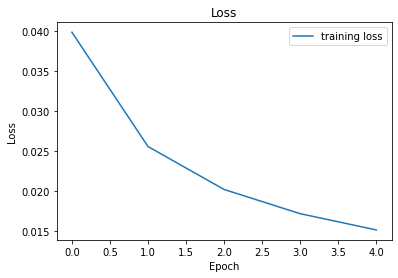

In [ ]:

plt.plot(np.arange(0, numOfEpoch), M.history['loss'], label='training loss') 
#plt.plot(np.arange(0, numOfEpoch), M.history['binary_accuracy'], label='accuracy') 
plt.title('Loss')
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend()

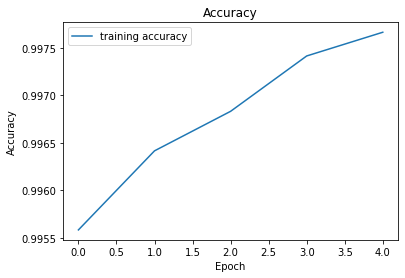

In [ ]:
fig = plt.figure()
plt.plot(np.arange(0, EPOCHS), M.history['binary_accuracy'], label='training accuracy') 
plt.title('Accuracy')
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend()

Chúng ta đã sẵng sàng để test mô hình đã được huấn luyện cho tập X_test.

In [ ]:
score = model.evaluate(X_test_norm, y_test_binary, verbose = 0)


In [ ]:
score

[0.017431791871786118, 0.9959999918937683]